In [1]:
import os
import sys
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.dataset import RGBDObjectDataset, RGBDObjectDataset_Supervised_Contrast
from src.models.rgbd_object.combined_model import CombinedModel, train, test

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

sys.version = 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
os.getcwd() = /home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee


In [3]:
DEVICE = setup_pytorch()

torch.__version__ = 1.12.1+cu113
torch.backends.cudnn.version() = 8302
torch.version.cuda = 11.3
DEVICE = cuda:0


In [4]:
BATCH_SIZE = 10 # Batch size
INPUT_SIZE = (256,256)
TRANSFORMATION = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(size=INPUT_SIZE)])
NB_MAX_TEST_SAMPLES = 100

test_dataset = RGBDObjectDataset_Supervised_Contrast(path="data/RGB-D_Object/rgbd-dataset",
                                                     mode="test",
                                                     transformation=TRANSFORMATION,
                                                     nb_max_samples=NB_MAX_TEST_SAMPLES)

test_data_loader = DataLoader(test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [5]:
model = CombinedModel().to(DEVICE)

In [6]:
# Run inference
encoded_features = []
labels = []
with torch.no_grad():
    for i, batch in enumerate(test_data_loader):
        
        # Load and prepare batch
        p_data_1, p_data_2, n_data = batch
        p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = p_data_1
        p_rgb_1 = p_rgb_1.to(DEVICE)
        # p_depth_1 = p_depth_1.to(DEVICE)
        # p_mask_1 = p_mask_1.to(DEVICE)
        # p_loc_x_1 = p_loc_x_1.to(DEVICE)
        # p_loc_y_1 = p_loc_y_1.to(DEVICE)
        p_label_1 = p_label_1.to(DEVICE)
        # p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = p_data_2
        # p_rgb_2 = p_rgb_2.to(DEVICE)
        # p_depth_2 = p_depth_2.to(DEVICE)
        # p_mask_2 = p_mask_2.to(DEVICE)
        # p_loc_x_2 = p_loc_x_2.to(DEVICE)
        # p_loc_y_2 = p_loc_y_2.to(DEVICE)
        # p_label_2 = p_label_2.to(DEVICE)
        # n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = n_data
        # n_rgb = n_rgb.to(DEVICE)
        # n_depth = n_depth.to(DEVICE)
        # n_mask = n_mask.to(DEVICE)
        # n_loc_x = n_loc_x.to(DEVICE)
        # n_loc_y = n_loc_y.to(DEVICE)
        # n_label = n_label.to(DEVICE)
        
        # Make predictions for batch
        encoded_x, predicted_label = model(p_rgb_1)

        # Save encoded features and labels
        encoded_features.append(encoded_x)
        labels.append(p_label_1)

torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 256, 256])


In [7]:
print(len(encoded_features))
print(encoded_features[0].shape)
print(encoded_features[0])

10
torch.Size([10, 256])
tensor([[0.1255, 0.3847, 0.6095,  ..., 0.0000, 0.3071, 0.0000],
        [0.0394, 0.2543, 0.3425,  ..., 0.0000, 0.0131, 0.0000],
        [0.1362, 0.0443, 0.0083,  ..., 0.0000, 0.3440, 0.0499],
        ...,
        [0.0000, 0.1340, 0.3088,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5465, 0.0000,  ..., 0.0000, 0.5191, 0.0772],
        [0.0000, 0.2983, 0.0307,  ..., 0.0000, 0.3428, 0.0000]],
       device='cuda:0')


In [10]:
encoded_features_arr = torch.empty(size=(NB_MAX_TEST_SAMPLES, 256))
print(encoded_features_arr.shape)
print(encoded_features_arr)
for i, batch in enumerate(encoded_features):
    encoded_features_arr[i * BATCH_SIZE:(i + 1) * BATCH_SIZE,:] = batch
print(encoded_features_arr.shape)
print(encoded_features_arr)

torch.Size([100, 256])
tensor([[ 2.3694e-38,  2.3694e-38,  2.3694e-38,  ...,  2.3694e-38,
          2.3694e-38,  2.3694e-38],
        [ 2.3694e-38,  2.3694e-38,  2.3694e-38,  ...,  2.3694e-38,
          2.3694e-38,  2.3694e-38],
        [ 2.3694e-38,  2.3694e-38,  2.3694e-38,  ...,  2.3694e-38,
          2.3694e-38,  2.3694e-38],
        ...,
        [-8.5129e-05,  4.9127e+08, -1.8700e+17,  ..., -1.8570e-31,
         -1.4071e-16,  4.5729e-41],
        [-1.4071e-16,  4.5729e-41, -3.5823e+32,  ...,  4.5727e-41,
          4.0258e-06,  6.4220e+32],
        [-4.9529e+14,  4.5727e-41, -4.9529e+14,  ...,  4.5727e-41,
         -1.8701e+17,  4.5727e-41]])
torch.Size([100, 256])
tensor([[0.1255, 0.3847, 0.6095,  ..., 0.0000, 0.3071, 0.0000],
        [0.0394, 0.2543, 0.3425,  ..., 0.0000, 0.0131, 0.0000],
        [0.1362, 0.0443, 0.0083,  ..., 0.0000, 0.3440, 0.0499],
        ...,
        [0.0000, 0.2445, 0.0272,  ..., 0.0000, 0.3683, 0.0000],
        [0.0000, 0.0774, 0.3397,  ..., 0.0000, 0.0900

In [11]:
print(len(labels))
print(labels[0].shape)
print(labels[0])

10
torch.Size([10])
tensor([43, 30, 46, 49, 24, 27, 36, 17, 11, 13], device='cuda:0')


In [12]:
labels_arr = torch.empty(size=(NB_MAX_TEST_SAMPLES,))
print(labels_arr.shape)
print(labels_arr)
for i, batch in enumerate(labels):
    labels_arr[i * BATCH_SIZE:(i + 1) * BATCH_SIZE] = batch
print(labels_arr.shape)
print(labels_arr)

torch.Size([100])
tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  9.1835e-41,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.4013e-45,  0.0000e+00,  9.9237e-35,  0.0000e+00,  1.1482e-41,
         7.4549e-43,  1.8393e-34,  4.5729e-41,  0.0000e+00,  0.0000e+00,
         1.8393e-34,  4.5729e-41,  2.3694e-38,  2.3694e-38,  2.3694e-38,
         3.6013e-43,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.4013e-45,
         0.0000e+00,  4.2039e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         3.3771e-43,  0.0000e+00, -1.8477e-14,  4.5729e-41, -1.8477e-14,
         4.5729e-41,  1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  8.2917e+26,
         0.0000e+00,  2.1675e-36,

In [13]:
# Apply TSNE
tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=1000,
            init="pca",
            random_state=42)

In [14]:
tsne_results = tsne.fit_transform(encoded_features_arr)

In [15]:
print(type(tsne_results))
print(tsne_results.shape)

<class 'numpy.ndarray'>
(100, 2)


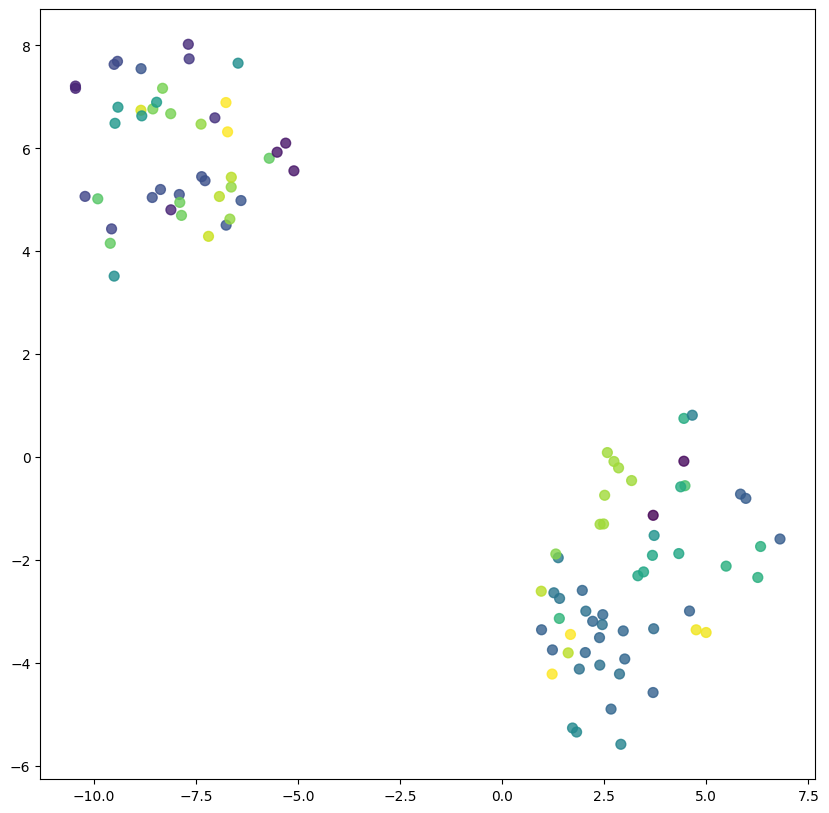

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_results[:,0], tsne_results[:,1], c=labels_arr, s=50, alpha=0.8)

In [17]:
# Apply TSNE
tsne = TSNE(n_components=3,
            perplexity=30,
            n_iter=1000,
            init="pca",
            random_state=42)

In [18]:
tsne_results = tsne.fit_transform(encoded_features_arr)

In [19]:
print(type(tsne_results))
print(tsne_results.shape)

<class 'numpy.ndarray'>
(100, 3)


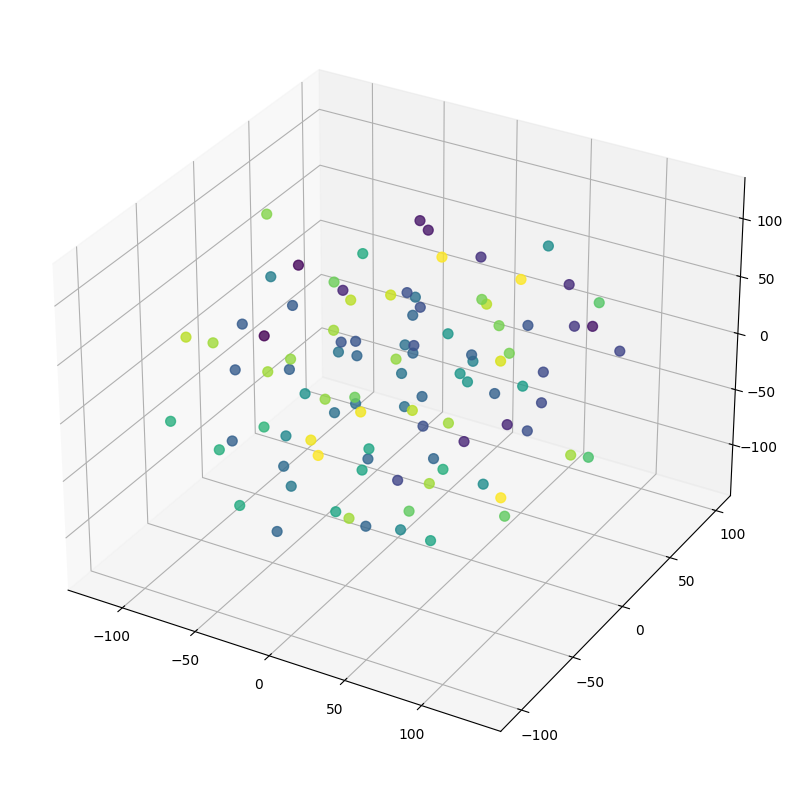

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.remove()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], c=labels_arr, s=50, alpha=0.8)